In [38]:
import matplotlib.pyplot as plt
import numpy as np

from hazma.gamma_ray_parameters import energy_res_comptel, energy_res_fermi
from hazma.pseudo_scalar_mediator import PseudoScalarMFV, PseudoScalarMediator

from utilities import get_color, get_tex_label, latex_text_width_1col

This function makes nice $\LaTeX$ labels for different final states

In [42]:
# Lepton-specific/type III 2HDM couplings
gpuu = 1.
gpdd = -1.
gpll = 0.

# General relations for MFV couplings
gpGG = 2*gpuu + gpdd
gpFF = gpll + (8.*gpuu + gpdd) / 9.

psm = PseudoScalarMFV(mx=220., mp=1e3, gpxx=1., gpuu=gpuu, gpdd=gpdd,
                      gpll=gpll, gpGG=gpGG, gpFF=gpFF)

vx_mw = 1.0e-3  # approximate Milky Way velocity dispersion

Choose arrays of photon energies.

In [43]:
e_gam_min, e_gam_max, n_e_gams = 5., 300., 250
e_gams = np.logspace(np.log10(e_gam_min), np.log10(e_gam_max), n_e_gams)

/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationW

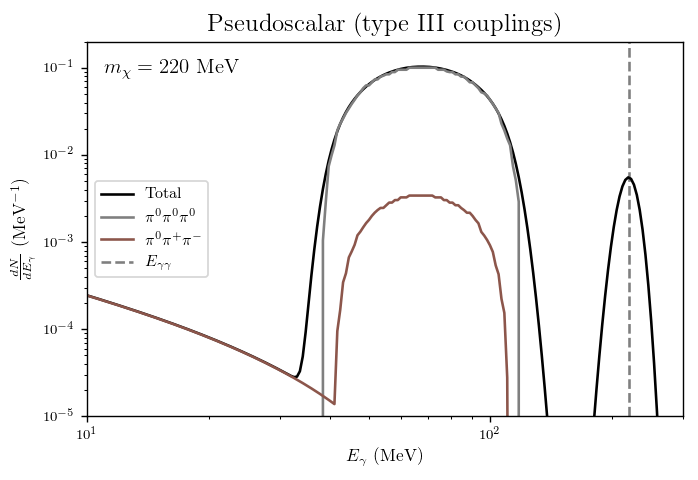

In [46]:
plt.figure(figsize=(latex_text_width_1col, 4))

# Center of mass energy, set to slightly above threshold
e_cm = 2.*psm.mx * (1. + 0.5 * vx_mw**2)

# Plot total convolved spectrum
dnde_det = psm.get_detected_spectrum(e_gam_min, e_gam_max,
                                     e_cm, energy_res=energy_res_comptel)
plt.loglog(e_gams, dnde_det(e_gams), "black", label="Total")

# Plot individual channels' spectra
for fs, spec in reversed(sorted(psm.spectra(e_gams, e_cm).iteritems())):
    if fs not in ["total", "p p", "e e", "mu mu", "g g"]:
        plt.loglog(e_gams, spec, label=get_tex_label(fs),
                   color=get_color(fs),
                   linewidth=1.5)

# Mark the lines' energies
for ch, line in psm.gamma_ray_lines(e_cm).iteritems():
    plt.axvline(line["energy"], linestyle='--', color="k",
                alpha=0.5, linewidth=1.5, label=r"$E_{\gamma\gamma}$")

### Formatting
plt.xlim(10, 300)
plt.ylim(1e-5, 2e-1)
plt.legend(loc="center left")
plt.xlabel(r"$E_\gamma$ (MeV)")
plt.ylabel(r"$\frac{dN}{dE_\gamma}$ (MeV$^{-1}$)")
plt.title(r"Pseudoscalar (type III couplings)")

# Label subplot with dark matter mass
plt.text(1.1e1, 8e-2, r"$m_\chi = %0.f$ MeV" % psm.mx)

plt.tight_layout()
plt.savefig("figures/pseudoscalar_spectra_mfv.pdf")